# JAM FITTER

In [1]:
import sys,os
sys.path.insert(0, "/group/JAM/webfitter/tmd/fitpack")
os.environ['FITPACK']="/group/JAM/webfitter/tmd/fitpack"
from fitlab.resman import RESMAN

In [2]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt

def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [3]:
path2results='sia_collins_only_pion1'
checkdir(path2results)

## data sets 

In [4]:
conf['datasets']={}

## SIA

In [5]:
conf['datasets']['sia']={}
conf['datasets']['sia']['filters']={0:{'idx':None,'filter':None}}
conf['datasets']['sia']['filters'][0]['idx']=[1000,1001,1002,1003,1004,1005,2008,2009]
conf['datasets']['sia']['filters'][0]['filter']="Q2>1.69"
conf['datasets']['sia']['xlsx']={}
conf["datasets"]["sia"]["xlsx"][1000]="sia/expdata/1000.xlsx"  
conf["datasets"]["sia"]["xlsx"][1001]="sia/expdata/1001.xlsx"  
conf["datasets"]["sia"]["xlsx"][1002]="sia/expdata/1002.xlsx"  
conf["datasets"]["sia"]["xlsx"][1003]="sia/expdata/1003.xlsx"  
conf["datasets"]["sia"]["xlsx"][1004]="sia/expdata/1004.xlsx"  
conf["datasets"]["sia"]["xlsx"][1005]="sia/expdata/1005.xlsx"
conf["datasets"]["sia"]["xlsx"][2008]="sia/expdata/2008.xlsx"  
conf["datasets"]["sia"]["xlsx"][2009]="sia/expdata/2009.xlsx"
conf['datasets']['sia']['norm']={}
for k in conf['datasets']['sia']['xlsx']: 
    conf['datasets']['sia']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 

## parameters

In [6]:
conf['params']={}
conf['shape']=1

### TMD PDF/FF parameters (from upol analysis)

In [7]:
conf['params']={}
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':5.89294556274006398056e-01,'fixed':True,'min':0,'max':1}
conf['params']['pdf']['widths0 sea']      = {'value':6.33443286558464269120e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.15151579728561548333e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.36784756168045196212e-01,'fixed':True,'min':0,'max':1}

### TMD Collins parameters

In [8]:
conf['params']['collins']={}
conf['params']['collins']['widths0 pi+ fav']     = {'value':7.47958632885192820083e-02,'fixed':False,'min':0.05,'max':0.10}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.059763576917398841815e+00,'fixed':False,'min':0.05,'max':0.136784756168045196212}
conf['params']['collins']['pi+ u N 1']  = {'value': 4.49239476315589936206e+00,'fixed':False,'min':0,'max':3}
conf['params']['collins']['pi+ u a 1']  = {'value':-8.28098465048009213518e-01,'fixed':False,'min':-1.9,'max':0}
conf['params']['collins']['pi+ u b 1']  = {'value': 6.60780815284983358282e+00,'fixed':False,'min':2,'max':6}

conf['params']['collins']['pi+ d N 1']  = {'value':-4.14852904854067539020e+00,'fixed':False,'min':-12,'max':0.0}
conf['params']['collins']['pi+ d a 1']  = {'value': 1.00000000000000000000e+00,'fixed':False,'min': 0,'max':7.0}
conf['params']['collins']['pi+ d b 1']  = {'value': 2.37348461151638101541e+00,'fixed':False,'min':2.5,'max':4.0}

conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 6.11150078306284516572e+00,'fixed':False,'min':0,'max':15}
conf['params']['collins']['pi+ u a 2']  = {'value': 4.71508421683099232524e+00,'fixed':False,'min':1,'max':8.0}
conf['params']['collins']['pi+ u b 2']  = {'value': 2.75387728005980081392e+00,'fixed':False,'min':0,'max':5}

conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [9]:
conf['ncpus']=1
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sia data sets 2009
multiprocess setup: ncpus=1 / observable


### start multiple NS runs
- the code will start n independent runs specified by size

In [10]:
conf['size']=3
conf['factor']=4 # play with the factor (3,4) and the tolerance (1.e-5,1.e-10)
conf['tol']=1e-8
mcsamp.run(path2results)

iter=811  logz=16.219 rel-err=3.397e-03  t-elapsed=1.795e+04  dchi2min=-5.107e+01 dchi2max=-4.759e+012

Process Process-3:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process Process-1:
Traceback (most recent call last):
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/group/JAM/webfitter/tmd/fitpack/fitlab/mcsamp.py", line 83, in single_run
  File "/group/JAM/webfitter/tmd/fitpack/fitlab/mcsamp.py", line 83, in single_run
    self.run()
  File "/apps/python/2.7.12/lib/python2.7/multiprocessing/process.py", lin

KeyboardInterrupt: 

### combine multiple runs into one big run

In [10]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
-27.776451033343676
-28.18230393365851
-28.180534305488486
sample  size= 15162
sample2 size= 1339


### distribution of parameters

In [11]:
os.listdir(path2results+'/mcdata')

['1.dat', '0.dat', '2.dat']

     widths0 pi+ fav =    0.07246 +/-    0.00181
   widths0 pi+ unfav =    0.11624 +/-    0.01598
           pi+ u N 1 =    1.12219 +/-    0.26396
           pi+ u a 1 =   -1.54616 +/-    0.10527
           pi+ u b 1 =    4.89219 +/-    0.39005
           pi+ d N 1 =   -6.72913 +/-    2.24230
           pi+ d a 1 =    3.98583 +/-    0.82682
           pi+ d b 1 =    3.03458 +/-    0.20125
           pi+ u N 2 =    8.04691 +/-    2.93961
           pi+ u a 2 =    3.24615 +/-    1.12910
           pi+ u b 2 =    3.70286 +/-    0.28945


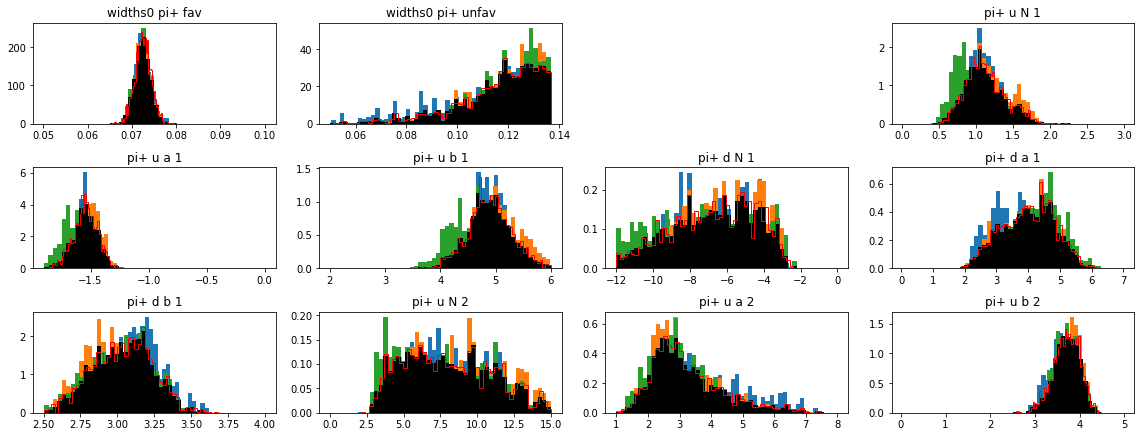

In [12]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=10,4
fig = py.figure(figsize=(ncols*4,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()

plot(['collins','widths0 pi+ fav','widths0 pi+ unfav',None])
plot(['collins','pi+ u N 1','pi+ u a 1','pi+ u b 1'])
plot(['collins','pi+ d N 1','pi+ d a 1','pi+ d b 1'])
plot(['collins','pi+ u N 2','pi+ u a 2','pi+ u b 2'])

## data vs theory

In [13]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].siares.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].siares.tabs[k]['thy']    
        norm=conf['datasets']['sia']['norm'][k]['value']
        shift=conf['resman'].siares.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sia.dat'))   

1339/1339

### compute averages and collect results

In [14]:
data=load('%s/%s'%(path2results,'sia.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].siares.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].siares.tabs[k]['dthy']=copy.copy(dthy[k])

In [15]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: 
        delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))

sia


In [16]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sia
   1000      BaBaR     9      18.36       0.00       0.00
   1001      BaBaR     9      10.97       0.00       0.00
   1002      BaBaR    36       9.27       0.00       0.00
   1003      BaBaR    36      23.85       0.00       0.00
   1004      belle    16      12.66       0.00       0.00
   1005      belle    16      13.24       0.00       0.00
   2008      BaBaR    16      16.39       0.00       0.00
   2009      BaBaR    16       4.87       0.00       0.00


### plot data and theory

In [17]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',        u'dthy',         u'dz1',
               u'dz2',     u'hadron1',     u'hadron2',           u'i',
               u'obs',          u'pT',       u'pTmax',       u'pTmin',
                u'qT', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',       u'sys_u',       u'syt_u',         u'thy',
             u'value',          u'z1',       u'z1max',       u'z1min',
                u'z2',       u'z2max',       u'z2min'],
      dtype='object')

In [18]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 52
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 52
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16


In [19]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [20]:
def plot(data):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_auc = data['AUC-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_aul = data['AUL-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))


        plt.subplot(n_row, n_col, index+1)
        plt.errorbar(data_auc.z2, data_auc.value, data_auc.alpha, 
                    marker='o', linestyle='', color='red', label='$A_{UC}$')
        plt.plot(data_auc.z2, data_auc.thy, linestyle='-', color='red')
        plt.fill_between(data_auc.z2, data_auc.thy-data_auc.dthy, data_auc.thy+data_auc.dthy,
                         color='black', alpha=0.8)


        plt.errorbar(data_aul.z2, data_aul.value, data_aul.alpha, 
                    marker='o', linestyle='', color='blue', label='$A_{UL}$')
        plt.plot(data_aul.z2, data_aul.thy, linestyle='-', color='blue')
        plt.fill_between(data_aul.z2, data_aul.thy-data_aul.dthy, data_aul.thy+data_aul.dthy, 
                         color='orange', alpha=0.8)
        
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        # the legend has theory labels and I dont like them.
        if len(data_auc) > 0 and len(data_aul) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

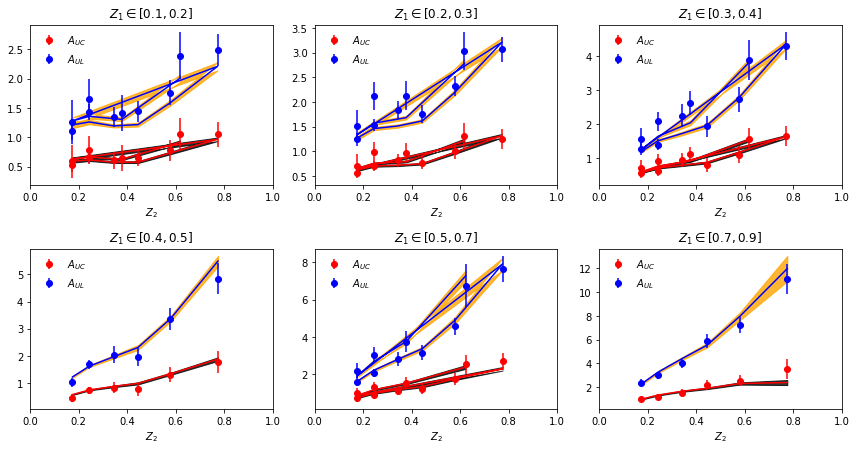

In [21]:
plot(data['BaBaR'])

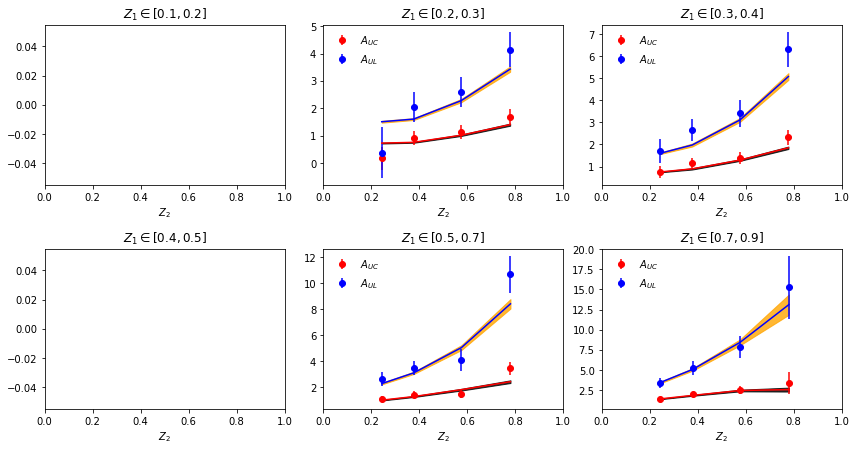

In [22]:
plot(data['belle'])

In [23]:
def plot_pt(data):
    plt.errorbar(data['BaBaR']['AUC-0-PT'].pT, 
                 data['BaBaR']['AUC-0-PT'].value, 
                 data['BaBaR']['AUC-0-PT'].alpha,
            linestyle='', marker='o', color='red',
                label='$A_{UC}$')
    
    plt.plot(data['BaBaR']['AUC-0-PT'].pT, 
             data['BaBaR']['AUC-0-PT'].thy, 
             linestyle='-', color='red')


    plt.errorbar(data['BaBaR']['AUL-0-PT'].pT, 
                 data['BaBaR']['AUL-0-PT'].value, 
                 data['BaBaR']['AUL-0-PT'].alpha,
            linestyle='', marker='o', color='blue',
                label='$A_{UL}$')

    plt.plot(data['BaBaR']['AUL-0-PT'].pT, 
             data['BaBaR']['AUL-0-PT'].thy, 
             linestyle='-', color='blue')

    # the legend has theory labels and I dont like them.
    if len(data['BaBaR']['AUC-0-PT']) > 0 and len(data['BaBaR']['AUL-0-PT']) > 0:
        handles, labels = plt.gca().get_legend_handles_labels()
        good_handles = []
        good_labels = []
        
        for handle, label in zip(handles, labels):
            if 'thy' not in label:
                good_handles.append(handle)
                good_labels.append(label)
    
    plt.legend(good_handles, good_labels, frameon=False)
    plt.xlabel('$P_{T}$')

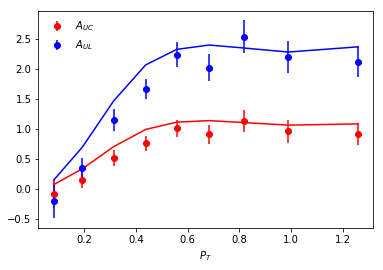

In [24]:
plot_pt(data)

## PDFs and FFs

In [25]:
def calc(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',MC['weights2'],RAW)
    df=np.einsum('k,kif->if',MC['weights2'],(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [26]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,0.999)
Z=np.append(Z1,Z2)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

1339/1339

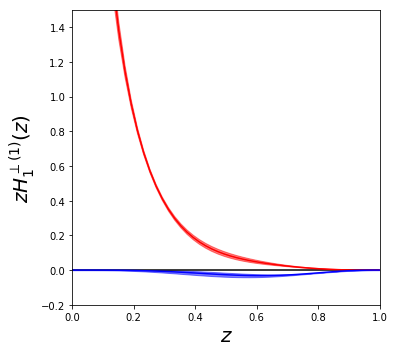

In [27]:
nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*5))
ax=py.subplot(nrows,ncols,1)
ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5)
ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5)
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Hpi['f'][1],'r')
ax.plot(Z,Z*Hpi['f'][3],'b')
ax.set_ylabel(r'$z H_1^{\perp (1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.2,1.5)
ax.set_xlim(0,1)


py.tight_layout()